Netflix dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - Actors involved in the movie/series,genre, directors of the movies, ratings, when were movies/series released and added on the platform . I will use this data to answer the following problems/questions:

1.what is the most content watched on Netflix and why
2.In which year were the highest 'type' released and opinion after finding
3.Country producing the most content watched?


This project will use the Netflix dataset from Kaggle.
Kaggle dataset link :https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #used for plotting data 
import seaborn as sns#used for Visualisation
%matplotlib inline


# Reading and checking data

In [2]:
pwd

'C:\\Users\\monotolu\\Downloads'

In [3]:
df = pd.read_csv('netflix_titles2.csv', delimiter=';',encoding='latin-1',on_bad_lines='skip')

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8804,15-Aug,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8800,14,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,220,1 Season,1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking how many rows and colunms are in the df dataframe
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# missing Value percentage count
for i in df.columns:
  nan_col = df[i].isna().sum() / len(df) * 100
  if nan_col > 0:
    print("{} nan_col {}%" .format(i,round(nan_col,2)))

director nan_col 29.91%
cast nan_col 9.37%
country nan_col 9.44%
date_added nan_col 0.11%
rating nan_col 0.08%


In [9]:
#check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#Check if the Data types are numerical (int,float) or categorical (object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
#data count
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8800
duration        8807
listed_in       8807
description     8807
dtype: int64

In [12]:
#checking columns
df.columns[np.sum(df.isnull()) == 0]

Index(['show_id', 'type', 'title', 'release_year', 'duration', 'listed_in',
       'description'],
      dtype='object')

# Data Cleaning and Visualisation

In [13]:
#data count before Cleaning
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8800
duration        8807
listed_in       8807
description     8807
dtype: int64

In [14]:
#director column have maximum number null values (29.9%) BUT
# has very little impact on the dataframe so dropping the
#column will have a huge impact on my output result
#same as Country and Cast Member
df['director'].fillna('unknown director',inplace=True)
df['country'].fillna('unknown country',inplace=True)
df['cast'].fillna('unknown cast',inplace=True)

In [15]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['rating', 'date_added', 'duration'], inplace=True)


In [16]:
#After Cleaning Data
df.count()

show_id         8790
type            8790
title           8790
director        8790
cast            8790
country         8790
date_added      8790
release_year    8790
rating          8790
duration        8790
listed_in       8790
description     8790
dtype: int64

<Axes: >

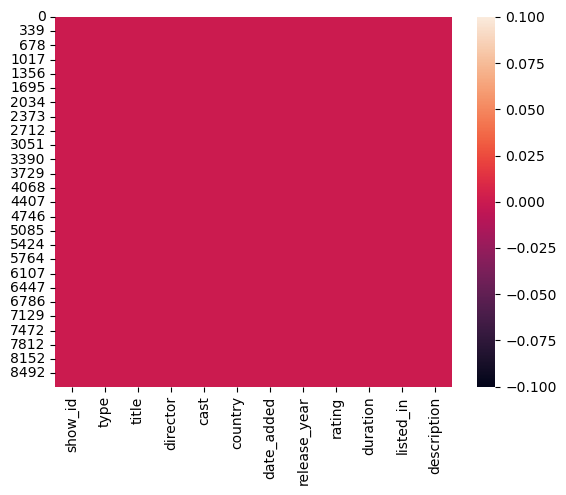

In [17]:
#heatmap to show missing values
sns.heatmap(df.isnull())

# 1.Which is the most content watched on Netflix and why?

Visualisation

In [18]:
#Movies VS TV Show

df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [19]:
# Plotting the graph
 
def plot_graph(df,x,hue):
    
 
#  '''

#     param df: the dataframe that contains the data

#     param x : the x  axis feature to be plotted

#     param hue: the hue parameter

#     the function returns a a plot of interest.
 
 
# '''

    sns.set(style="darkgrid")

    plt.figure(figsize=(10, 6))

    ax = sns.countplot(x=x, hue=hue, data=df)

    plot.show()


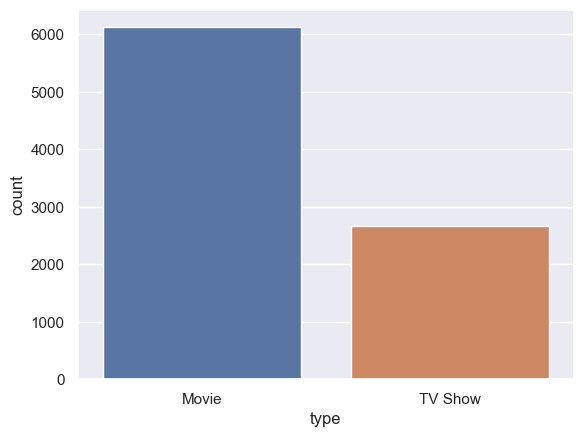

In [20]:
#Analysis of Movies vs TV Shows(content distribution)
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df)

Text(0.5, 1.0, 'Sum of Movies by Type')

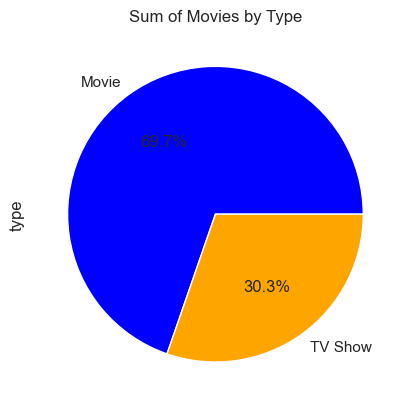

In [21]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])                                                                   
                                                       
plt.title('Sum of Movies by Type')

Movies mostly watched than Series (TV Shows)


In [22]:
# dNumber of Season per Series aired
# Assuming df is your DataFrame
tv_shows = df[df['type'] == 'TV Show']

# Display the top 10 unique values in the 'duration' column for TV Shows
print(tv_shows['duration'].value_counts().head(10))

1 Season      1790
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
Name: duration, dtype: int64


62.55% of the series aired have only Season 1 and 17.4% has Season 2. This indicates that a significant portion of the shows have not progressed beyond their initial season. This might influnce the audience to watch more standalone content


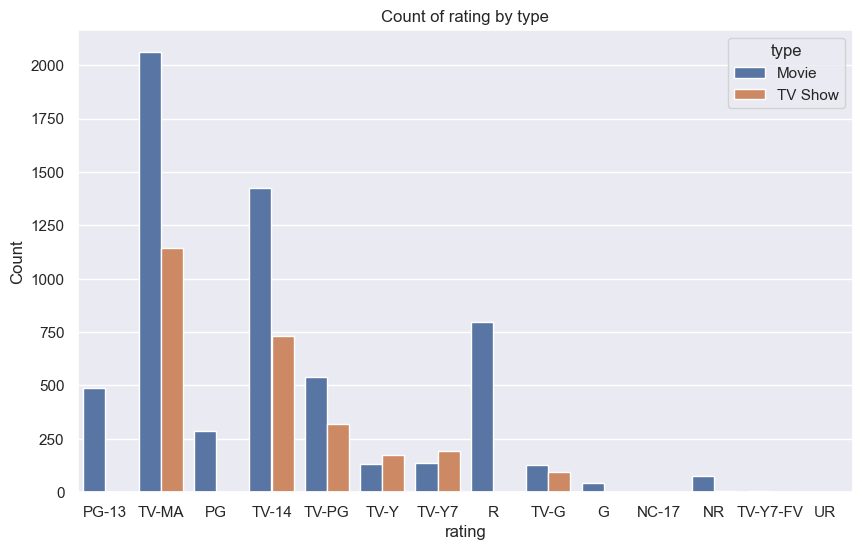

In [23]:
def plot_graph(data, x, hue=None):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))
    if hue:
        ax = sns.countplot(x=x, hue=hue, data=data)
    else:
        ax = sns.countplot(x=x, data=data)
    plt.title(f'Count of {x}' + (f' by {hue}' if hue else ''))
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

# Example usage:
plot_graph(df, 'rating', hue='type')

TV-MA are the most watched rating.which are Adult scene +18
the below graph shows a split of ratings watched between movies and TV Shows

In [24]:
# Genre of shows
df.listed_in.value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

# Which Year Produced Most Content

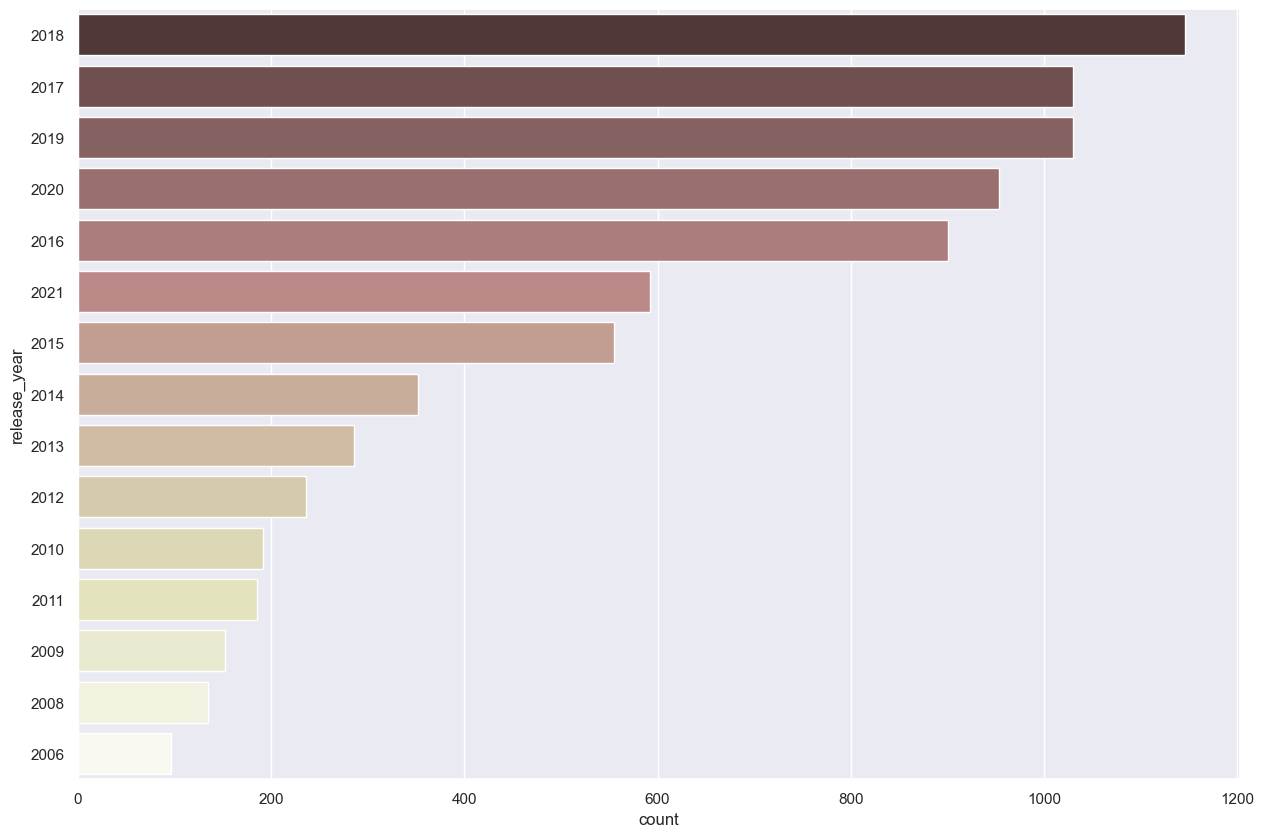

In [25]:
#analyzing when movies/series were released that shaped the content offered
plt.figure(figsize=(15,10))
sns.countplot(data=df, y='release_year',palette='pink', order=df['release_year'].value_counts().index[0:15])
plt.show()

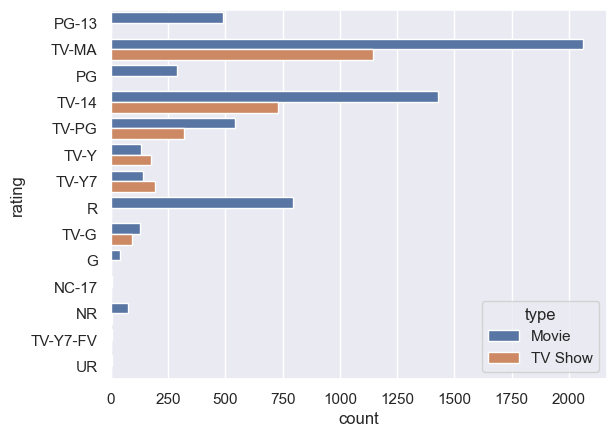

In [26]:
#Generatiom watcng most of the content on Netflix
# Assuming df is your DataFrame
sns.set(style="darkgrid")
ax = sns.countplot(y="rating", hue='type', data=df)

plt.show()  # This is necessary to display the plot

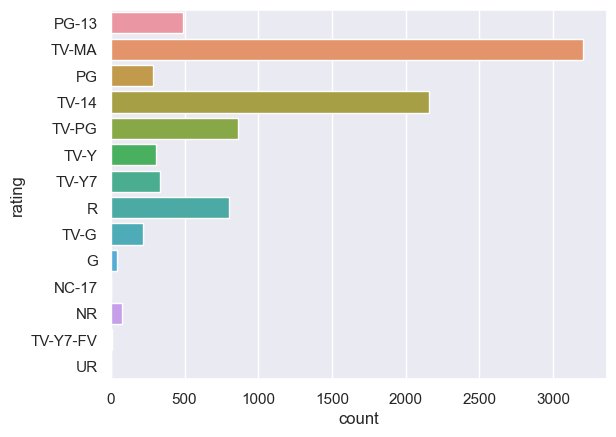

In [27]:
# movies/TV Show rating analysis
sns.set(style="darkgrid")
ax = sns.countplot(y="rating", data=df)

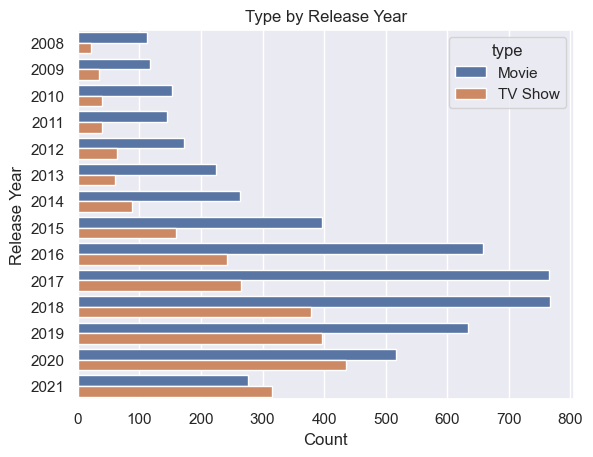

In [28]:
#Analyzing what type of content were released over the years
selected_years = range(2008, 2022)

# Filter the DataFrame for the selected years
filtered_df = df[df['release_year'].isin(selected_years)]

sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", hue='type', data=filtered_df)
plt.title("Type by Release Year")
plt.xlabel("Count")
plt.ylabel("Release Year")

# Show the plot
plt.show()

'Movies' are mostly the most released content more that 'TV Shows'
except in 2021 where we see a decrease in movie creation but an increase 
in TV Series Content creation(getting more Series Seasons created (I hope so )

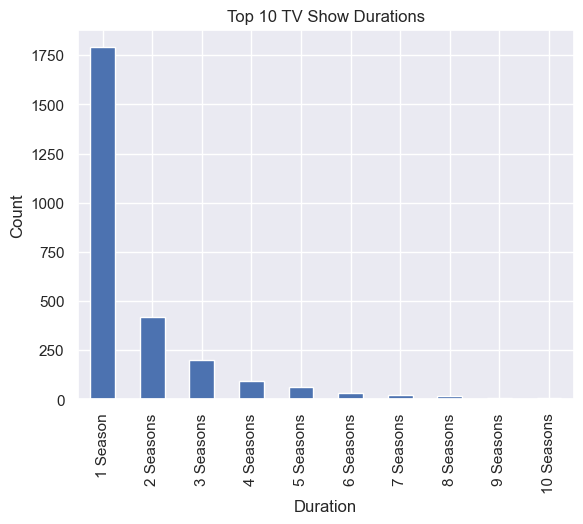

In [29]:
# Duration of series analysis
# Filter TV shows
tv_shows = df[df['type'] == 'TV Show']

# Plot the top 10 unique values in the 'duration' column for TV Shows
tv_shows['duration'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

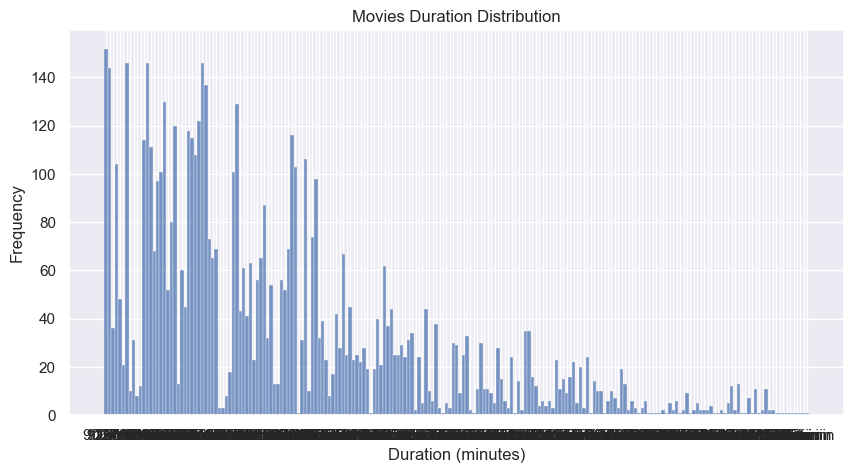

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(x='duration', data=df[df['type'] == 'Movie'])
plt.title('Movies Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

There is a fair amount of viewership for both TV series and movies, but the challenge lies in the relatively limited number of choices for TV series compared to movies. This observation could be valuable for content providers or platforms to consider expanding their content library especially for TV Series.

In [31]:
# Top countries producing most content
df.country.value_counts()

United States                             2809
India                                      972
unknown country                            829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

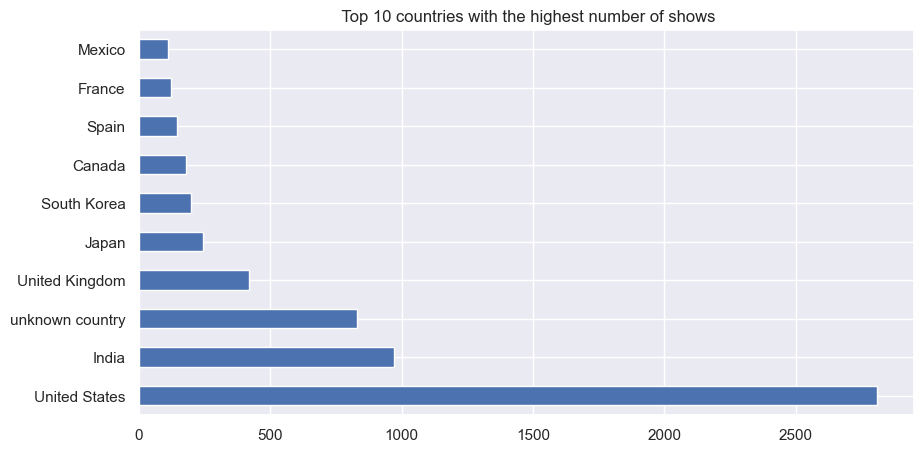

In [32]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

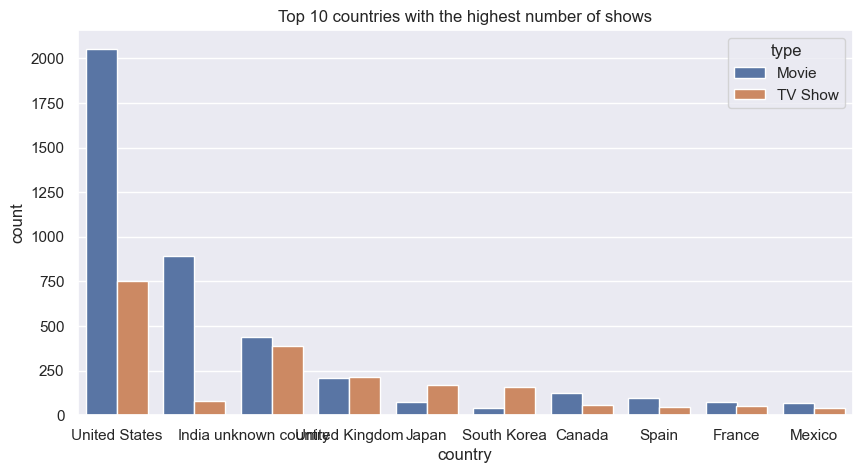

In [33]:
# Get the top 10 countries with the highest number of shows
top_10_countries = df['country'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df[df['country'].isin(top_10_countries)]

# Set the figure size
plt.figure(figsize=(10, 5))

# Plotting the countplot
sns.countplot(data=df_top_10, x='country', hue='type', order=top_10_countries)

# Set title and show the plot
plt.title('Top 10 countries with the highest number of shows')
plt.show()

South Korea and Japan dominates the TV Show content creation

Text(0.5, 1.0, 'Top 10 movie directors')

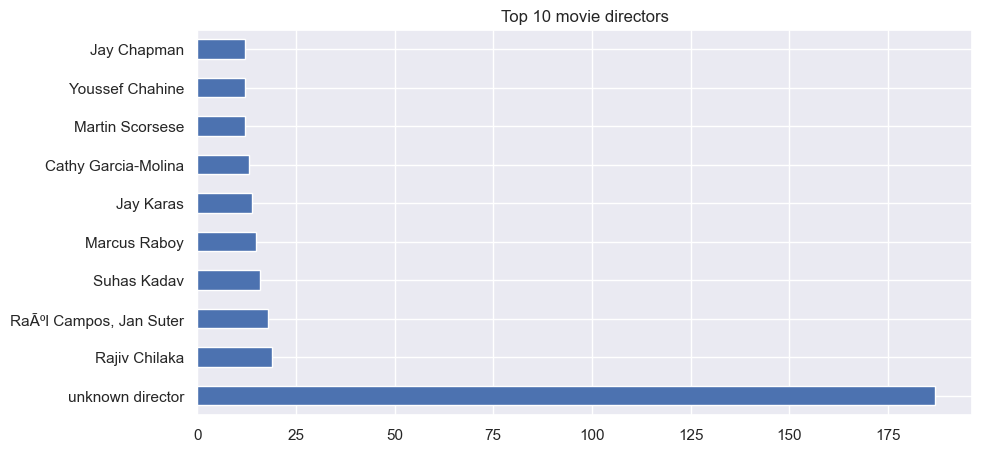

In [34]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')


Rajiv Chilaka is thetop director followed by Raul Campos and Jan Suterwho have  directed 17 movies, higher than anyone yet.If you dont know them,y0u need to use your Netflix subscription more often

# Conclusion
From the Netflix data a few observations were seen

*Movies have a widespread appeal and attract audiences of all ages

*TV shows, particularly popular series, can accumulate large viewership numbers over time with extended seasons and multiple episodes

*Streaming platforms have also significantly changed the landscape, allowing for binge-watching entire seasons at once, which can lead to increased viewership numbers for TV shows.

*Ultimately, the popularity of movies versus TV shows can fluctuate based on various factors, and both mediums will continue to attract significant viewership worldwide.